In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# Dependencies
import requests
from pprint import pprint
import numpy as np
import gmaps
import json
import os
from scipy.stats import linregress
from datetime import datetime
import time

# Google developer API key
from config import g_key

In [12]:
#retreives weather data from a .csv called "conventional_weather_stations_inmet_brazil_1961_2019" and delimits it by a ";"
rain_data = pd.read_csv("csv_files/conventional_weather_stations_inmet_brazil_1961_2019.csv", sep=";")

#removes column "Unnamed: 19" from rain_data dataframe
del rain_data["Unnamed: 19"]

#locates the "Data" ("Date") column and coverts it into a standard format
rain_data["Data"]=pd.to_datetime(rain_data['Data'])

#splits "Data" column into 3 new columns by Day, Month, and Year
rain_data['Day'] = rain_data['Data'].dt.day
rain_data['Month'] = rain_data['Data'].dt.month
rain_data['Year'] = rain_data['Data'].dt.year
rain_data=rain_data.loc[rain_data["Year"] >1987].reset_index()

#Renames all columns in data frame from their original Portuguese to English
rain_data = rain_data.rename(columns={"Estacao": "Station", "Data": "Date", "Hora":"Time","Precipitacao":"Precipitation","UmidadeRelativa":"Relative Humidity","PressaoAtmEstacao":"Weather Presure","PressaoAtmMar":"Sea Pressure","TempBulboSeco":"DryBulb Temp","TempBulboUmido":"WetBulb Temp","TempMaxima":"Maximum Temp","TempMinima":"Minimal Temp","DirecaoVento":"Wind Ventilation","Insolacao":"Isolation","Nebulosidade":"Cloudiness","Evaporacao Piche":"Tar Evaporation","Temp Comp Media": "Average Temp","Umidade Relativa Media":"Average Humidity","Velocidade do Vento Media":"Average Wind Speed"})
rain_data.to_csv("csv_files/clean_weather_station_data.csv")

#isolates precipitation data that is greater than or equal to 0.0 mm
rain_df = rain_data.loc[rain_data["Precipitation"]>=0.0]

#Imports station_and_state.csv into a data frame and drops "Unnamed: 0" column
station_df = pd.read_csv("csv_files/station_and_state.csv")
station_df =station_df.drop(["Unnamed: 0"], axis=1)

#drops columns that will not be used in data analysis
rain_df=rain_df.drop(["Date","DryBulb Temp", "Weather Presure", "Sea Pressure","Wind Ventilation","WetBulb Temp", "Maximum Temp", "Minimal Temp", "Relative Humidity", "VelocidadeVento", "Isolation", "Cloudiness","Tar Evaporation","Average Temp", "Average Humidity","Average Wind Speed","Day","Month"],axis =1)

#merges station location data with rainfall data
rs = rain_df.merge(station_df,on="Station")

#locates only states where deforestation is occuring. 
states=[' AC', ' AP'," AM"," MA"," MT"," PA"," RO"," RR"," TO"]
rain_state=rs.loc[rs["State"].isin(states)]
#rain_state.to_csv("..csv_files/Rain_by_state.csv")
rain_state

,index,Station,Time,Precipitation,Year,Station Name,State
0,18988,82024,1200,0.0,1988,BOA VISTA,RR
1,18991,82024,1200,0.0,1988,BOA VISTA,RR
2,18994,82024,1200,0.0,1988,BOA VISTA,RR
3,18997,82024,1200,0.0,1988,BOA VISTA,RR
4,19000,82024,1200,0.0,1988,BOA VISTA,RR
...,...,...,...,...,...,...,...
2532791,11950956,83364,1200,0.0,2019,PADRE RICARDO REMETTER,MT
2532792,11950959,83364,1200,2.5,2019,PADRE RICARDO REMETTER,MT
2532793,11950962,83364,1200,1.4,2019,PADRE RICARDO REMETTER,MT
2532794,11950965,83364,1200,23.6,2019,PADRE RICARDO REMETTER,MT


In [13]:
#group dataframe by Year and State and calculates the average rainfall per state per year
mean_rainfall=rain_state.groupby(["Year","State"])["Precipitation"].mean()
ave_rainfall=mean_rainfall.reset_index()
ave_rainfall.to_csv('csv_files/average_rainfall_by_year_by_state.csv')
ave_rainfall

,Year,State,Precipitation
0,1988,AC,6.638603
1,1988,AM,7.770970
2,1988,AP,7.098630
3,1988,MA,5.146446
4,1988,MT,4.523193
...,...,...,...
245,2019,MA,4.539235
246,2019,MT,4.000315
247,2019,PA,6.880069
248,2019,RR,6.075104


In [14]:
#AM_state = ave_rainfall.loc[ave_rainfall["State"]==" MT"]
#AM_state

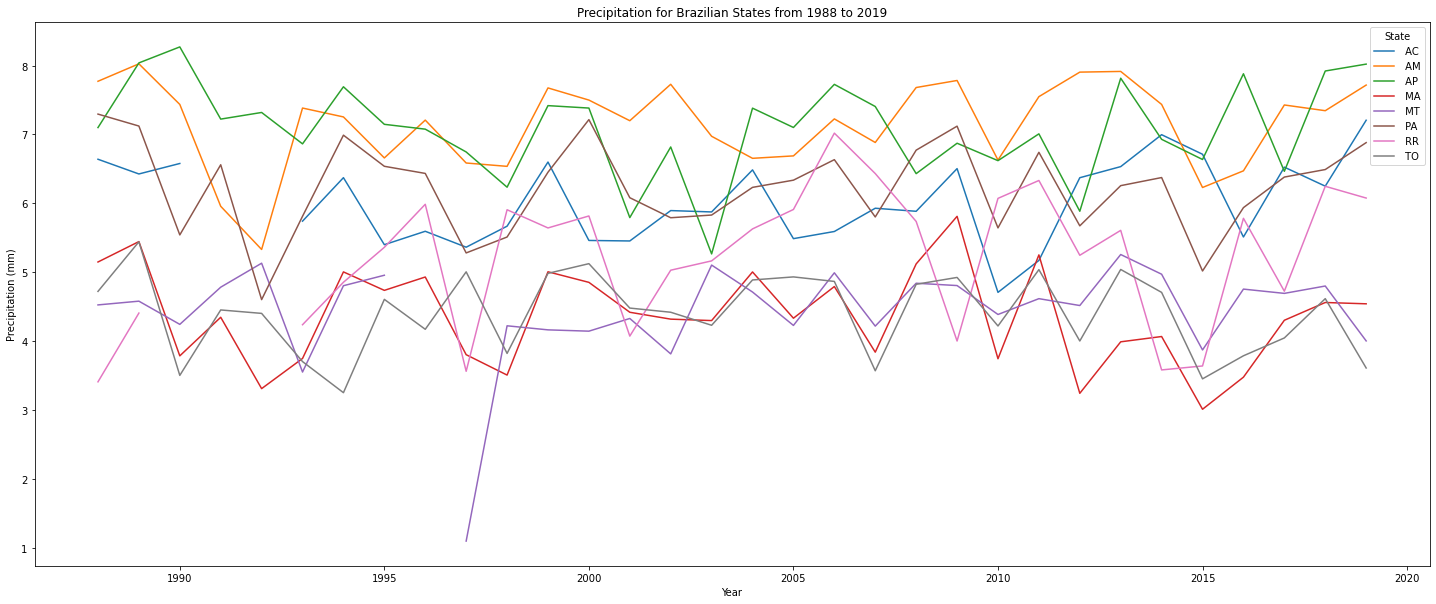

In [15]:
#plots each state's rainfall data for each between 1988 to 2019 in a pivot line chart
ax=ave_rainfall.pivot(index='Year',columns="State",values="Precipitation")
ax.plot(kind="line",ylabel="Precipitation (mm)",figsize=(25,10),title="Precipitation for Brazilian States from 1988 to 2019")
plt.show()